# Torture the data and it will confess to Anything -- Ronald Coase

# Supervised Learning Algorithm


Supervised learning is the types of machine learning in which machines are trained using well "labelled" training data, and on basis of that data, machines predict the output. The labelled data means some input data is already tagged with the correct output.

In supervised learning, the training data provided to the machines work as the supervisor that teaches the machines to predict the output correctly. It applies the same concept as a student learns in the supervision of the teacher.

# Decision Trees

Our Goal is to demonstrate how Decision Tree is used for classification Purpose.

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv("penguins.csv")

In [40]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [42]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [43]:
df.isnull().sum()/len(df)

species              0.000000
island               0.000000
culmen_length_mm     0.005814
culmen_depth_mm      0.005814
flipper_length_mm    0.005814
body_mass_g          0.005814
sex                  0.029070
dtype: float64

In [44]:
df = df.dropna()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [46]:
df.shape

(334, 7)

In [47]:
# object data types
cat_col = [col for col in df.columns if df[col].dtype == 'object']
cat_col

['species', 'island', 'sex']

In [48]:
#Exploreing categorical variables
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

species
Adelie       146
Gentoo       120
Chinstrap     68
Name: species, dtype: int64

island
Biscoe       164
Dream        123
Torgersen     47
Name: island, dtype: int64

sex
MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64



In [49]:

df = df[df['sex'] != '.']

In [50]:
pd.get_dummies(df)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,1,0,0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,1,1,0,0,1,0
340,46.8,14.3,215.0,4850.0,0,0,1,1,0,0,1,0
341,50.4,15.7,222.0,5750.0,0,0,1,1,0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,1,1,0,0,1,0


In [51]:
pd.get_dummies(df.drop('species',axis=1),drop_first=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


<AxesSubplot:xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

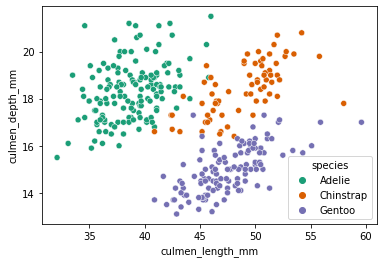

In [52]:
sns.scatterplot(x='culmen_length_mm',y='culmen_depth_mm',data=df,hue='species',palette='Dark2')

In [53]:
### Defining Variables  
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']


In [54]:
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1


In [55]:
X.shape

(333, 7)

In [56]:
y.shape

(333,)

# The Decision Trees Model

In [57]:
from sklearn.tree import DecisionTreeClassifier


In [58]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,random_state = 3)

In [62]:
# help(DecisionTreeClassifier())

In [63]:
clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 8,random_state = 42)
clf = clf.fit(X_train, y_train)

In [64]:
base_pred = clf.predict(X_test)

# Evaluation

In [65]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [66]:
confusion_matrix(y_test,base_pred)

array([[42,  1,  4],
       [ 1, 14,  0],
       [ 0,  0, 38]], dtype=int64)

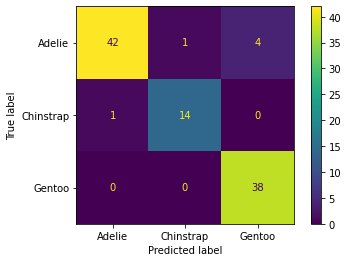

In [67]:
plot_confusion_matrix(clf,X_test,y_test)

In [68]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

      Adelie       0.98      0.89      0.93        47
   Chinstrap       0.93      0.93      0.93        15
      Gentoo       0.90      1.00      0.95        38

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



In [69]:
X.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE'],
      dtype='object')

In [70]:
clf.feature_importances_

array([0.53813192, 0.00126104, 0.03853744, 0.        , 0.4220696 ,
       0.        , 0.        ])

# Visualize the Tree

In [71]:
from sklearn.tree import plot_tree

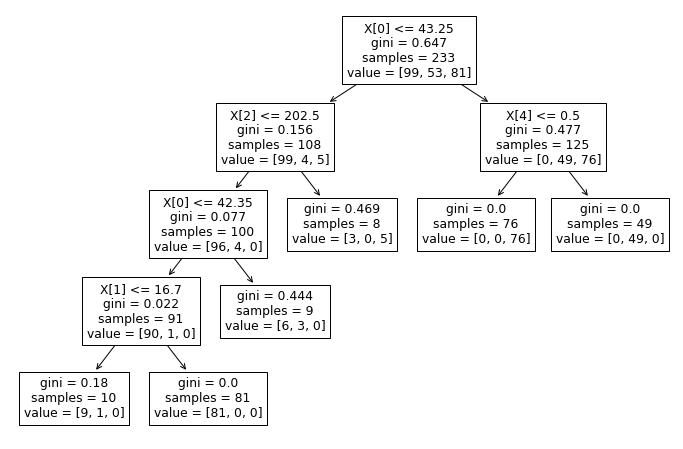

In [72]:
plt.figure(figsize=(12,8))
plot_tree(clf);

### Gini impurity 
Gini impurity is an important measure used to construct the decision trees. Gini impurity is a function that determines how well a decision tree was split. Basically, it helps us to determine which splitter is best so that we can build a pure decision tree. Gini impurity ranges values from 0 to 0.5.

In [ ]:
# https://analyticsindiamag.com/understanding-the-maths-behind-the-gini-impurity-method-for-decision-tree-split/#:~:text=Gini%20impurity%20is%20an%20important%20measure%20used%20to%20construct%20the%20decision%20trees.&text=Gini%20impurity%20is%20a%20function,values%20from%200%20to%200.5.

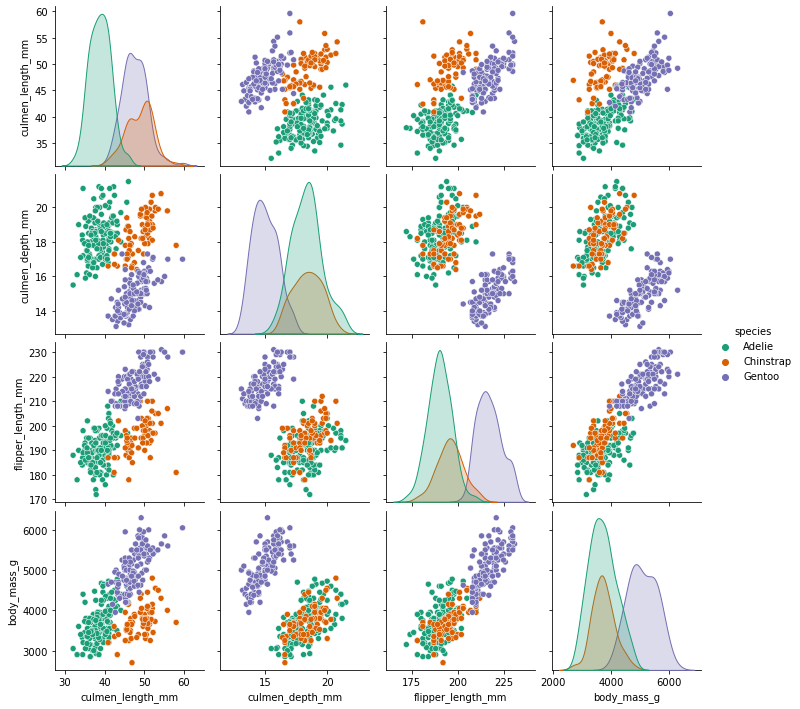

In [73]:
sns.pairplot(df,hue='species',palette='Dark2')